# MEMORY MODEL FOR HLS WITH FPGAs 

#### Please, run each cell sequentially. 
#### We shows for each LSU type
#### 1) Measurements captured from profiler and Report Files and the figures generated for the paper.
#### 2) Model estimation, and dependency analisys described in the paper

## Burst Coalesced Aligned

In [344]:
import pandas as pd

mc1 = pd.read_csv("testMX_C_SVSB.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mc1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr. Write Burst,Avr. Read Burst,Stall Read (%),Stall Write (%),Occupancy Write(%),...,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s),ALUT,FFS,RAMs,DSPs
0,1,2,456.20,0.0,3639.0,16,0,0,"0,0",100,...,1,64,0,0,106,3639.0,120158,280794,701,0
1,1,4,456.20,0.0,7265.0,16,0,0,"0,8",100,...,1,128,0,0,106,7265.0,120641,281952,702,0
2,1,8,456.20,0.0,11716.3,16,0,0,"19,3",81,...,1,256,0,0,106,11716.3,121620,284383,705,0
3,1,16,454.33,0.0,11712.5,16,0,0,"19,0",41,...,1,512,0,0,106,11712.5,123879,290877,719,0
4,2,2,455.60,3639.0,3639.0,15,11,"0,00","0,00",100,...,1,64,1,64,641,3639.0,122184,285396,712,0
5,2,4,450.00,7178.0,7178.0,15,16,"0,00","0,67",100,...,1,128,1,128,641,7178.3,122440,287368,712,0
6,2,8,455.60,11708.0,11708.0,15,16,"0,00","19,29",81,...,1,256,1,256,641,11707.6,122561,288784,712,0
7,2,16,455.60,11702.0,11702.0,15,17,"13,53","19,29",40,...,1,512,1,512,641,11701.8,123325,294741,725,0
8,3,2,452.07,3595.0,3595.0,15,11,"0,00","0,00","100,0",...,2,64,1,64,646,3595.0,124584,292352,724,0
9,3,4,456.20,7274.0,7274.0,15,16,"0,00","0,00","100,0",...,2,128,1,128,646,7274.0,124905,292914,726,0


In [109]:
#Import and set the label in figures
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']
marker_data=['v','X','o','D','s']
fs=12

BW_1866=14928 #bytes/s
group = ("#ga=1", "#ga=2", "#ga=3", "#ga4", "#ga5")
width = ("64", "128", "256", "512")
fs=12
r=1
c=1

## Model Burst Coalesced Aligned GMI

### We model the memory based on description of the hld/ips of altera. 

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/angelica/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


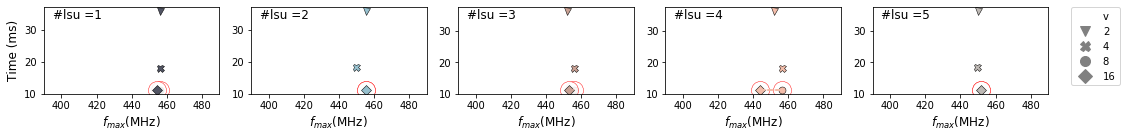

In [348]:
#Frequency Dependency graph
from matplotlib.ticker import FormatStrFormatter
r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.6))
plt.subplots_adjust(hspace=0.45,wspace=0.15)
# i=0
group = ['#lsu =1', "#lsu =2", "#lsu =3", "#lsu =4", "#lsu =5"]
groupW = ["v","2", "4", "8", "16"]
min_frq=np.min(mc1.get("Frequency (MHz)"))

dqbl=32


WD=mc1.get("Width LD")
LSU=np.ones(len(WD))
max_burts= WD/8 *LSU /dqbl

#filter to graph only the memory bound part  
bin=(max_burts>=1)    
bin= np.multiply(bin,1)
x=np.ones(4)
y=np.ones(4)

plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
    
        if (bin[i*4+j]==1):
            plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color='white',
              marker=marker_data[2],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='red',
              markersize=18,
              alpha=0.9        
                 )
            x[j]=mc1.loc[[i*4+j], "Frequency (MHz)"]
            y[j]=mc1.loc[[i*4+j], "Time (ms)"]
        else: 
            x[j]=mc1.loc[[i*4+3], "Frequency (MHz)"]
            y[j]=mc1.loc[[i*4+3], "Time (ms)"]
        
        plt.plot (mc1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
              markersize=7
                 )
        plt.xlim([390, 490])

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),color=colorcycle[i],linestyle="--")
    #plt.plot (x,y)
    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$f_{max}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)
#
#plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle=""),
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='grey',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='grey',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='grey',lw=1,markersize=10),
             ]
#ax1
cont=np.concatenate([groupW])
#plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))
plt.legend(custom_lines,cont,loc=2,bbox_to_anchor=(1.1, 1.05))
#plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(2, 1.05))

plt.savefig('Frq_dep_HBM.pdf',bbox_inches="tight")

factor_c=mc1.loc[:, "Time (ms)"]/mc1.loc[:, "Frequency (MHz)"]

In [345]:
group = ("Measured LD/ST=1", "Measured LD/ST=2", "Measured LD/ST=2", "Measured LD/ST=3", "Measured LD/ST=4")
group2 = ("Estimated LD/ST=1", "Estimated LD/ST=2", "Estimated LD/ST=2", "Estimated LD/ST=3", "Estimated LD/ST=4")
group = ("LSU=1", "LSU=2", "LSU=3", "LSU=4", "LSU=5")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
title = ("", "LD/ST=2", "LD/ST=2", "LD/ST=3", "LD/ST=4")


LSU=mc1.get("LOAD/STORE")
WD=mc1.get("Width LD")
SIMD=mc1.get("SIMD")
FRQ=mc1.get("Frequency (MHz)")*1e6
TIME=mc1.get("Time (ms)")
LATENCY=mc1.get("Latency")
LSU=np.ones(len(WD))



BW=12800e6
# Fmem=2666e6
Fmem=1600e6
dqbl=64/2
K_width=64
burst_n=5

#update
fmax=450e6
fmin=BW/dqbl*(dqbl*8/(WD))

print(fmin/1e6)
BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LSU[i] == 1):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(fmax*2/fmin[i])
            #BW[i]=BW[i]*(fmax/(fmin[i]))
    if (BW[i]>14928e6):
        BW[i]=14928e6
print (BW)
##

TRCD=14e-9
TRP =14e-9

WI=32768000
ls_bytes=4
delta=1

burst_size=2**(burst_n)*dqbl

Cco=np.ones(len(WD))
Cycles=Cco
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 
for i in range (0,len(WD)):
     LSU[i]=1
     T_ovh[i]=((LSU[i])/(burst_size))*(TRCD+TRP)*ls_bytes*WI 
     if (LSU[i]<3):
        T_ovh[i]=0

     T_exe[i]=T_ideal[i]+T_ovh[i]*delta

max_burts= WD/8 *LSU /dqbl

#filter to graph only the memory bound part  
bin=(max_burts>=1)    
bin= np.multiply(bin,1)
bin=(BW>=(12800e6)) 
#bin=np.ones(len(WD))
Est_time = (T_exe )*1000 *bin
T_ideal=(T_ideal)*1000 *bin
T_ovh=T_ovh*1000 *bin
error= (np.abs(Est_time-TIME)/TIME)*100

print ("Estimated Error in Burst Coalesced Aligned \n",error*bin)
print(np.mean(error*bin))

0     1600.0
1      800.0
2      400.0
3      200.0
4     1600.0
5      800.0
6      400.0
7      200.0
8     1600.0
9      800.0
10     400.0
11     200.0
12    1600.0
13     800.0
14     400.0
15     200.0
16    1600.0
17     800.0
18     400.0
19     200.0
Name: Width LD, dtype: float64
[3.60e+09 7.20e+09 1.28e+10 1.28e+10 3.60e+09 7.20e+09 1.28e+10 1.28e+10
 3.60e+09 7.20e+09 1.28e+10 1.28e+10 3.60e+09 7.20e+09 1.28e+10 1.28e+10
 3.60e+09 7.20e+09 1.28e+10 1.28e+10]
Estimated Error in Burst Coalesced Aligned 
 0     0.000000
1     0.000000
2     8.489723
3     8.489723
4     0.000000
5     0.000000
6     8.571429
7     8.571429
8     0.000000
9     0.000000
10    8.652988
11    8.734403
12    0.000000
13    0.000000
14    8.652988
15    8.652988
16    0.000000
17    0.000000
18    8.571429
19    8.571429
Name: Time (ms), dtype: float64
4.297926414063397


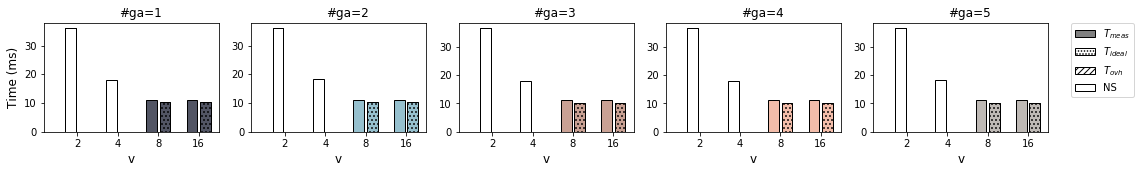

In [314]:
#Figures to paper showing the measured and estimated time
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

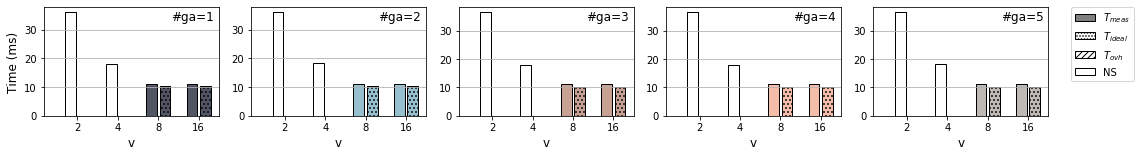

In [322]:
#Figures to paper showing the measured and estimated time
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        #external labels to cut graph
        #if TIME[i*4+j]>20.0:
        #   plt.text(3,20+1,TIME[i*4+j],horizontalalignment='right')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    #plt.ylim([0,20])
    plt.grid(axis='y')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


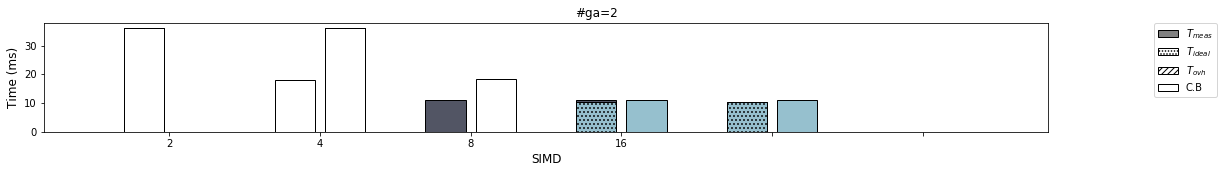

In [107]:
import matplotlib.patches as mpatches
r=1
c=1
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#B59194','#D2A1B8','#8F0000','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,2):   
    plt.subplot(r,c,1)
    y_pos=range(2+(i*2),16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j]+i*2,
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j]+i*2,
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1
                     ,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j]+i*2,
             np.divide(mc1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("SIMD",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,20])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',color='grey',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'C.B',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_coalesced_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

## Burst Coalesced Non-Aligned

In [115]:
import pandas as pd
mn1 = pd.read_csv("testMX_CNA_SVSB.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mn1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr Write Burst,Avr Read Burst,Stall Read (%),Stall Write (%),Occupancy Write(%),...,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s),ALUT,FFS,RAMs,DSPs
0,1,2,453.72,0.0,9712.3,15,0,0,"32,97 %","88,5 %",...,0,0,1,256,44,97123.0,121718,281807.000,707.000,0
1,1,4,456.20,0.0,10599.8,15,0,0,"27,12 %","48,1 %",...,1,512,1,512,44,105998.0,123471,285035.000,720.000,0
2,1,8,398.08,0.0,11125.6,16,0,0,"12,43 %","28,9 %",...,2,1024,1,1024,44,111256.0,126426,293093.000,747.000,0
3,1,16,429.92,0.0,11503.5,16,0,0,"16,12 %","13,9 %",...,3,2048,1,2048,44,115035.0,132587,307428.000,801.000,0
4,2,2,440.72,9526.0,9525.0,15,15,"0,00 %","19,64 %","89,4 %",...,0,256,1,256,238,9525.0,124857,288822.000,713.000,0
5,2,4,456.20,10618.0,10618.0,15,15,"0,00 %","27,08 %","48,2 %",...,1,512,1,512,238,10618.0,126988,294918.000,726.000,0
6,2,8,440.14,11149.0,11152.0,15,16,"0,70 %","20,71 %","26,2 %",...,2,1024,1,1024,238,11152.0,130747,302877.000,753.000,0
7,2,16,385.35,11092.0,11007.0,15,16,"0,67 %","10,56 %","14,9 %",...,3,2048,1,2048,238,11007.0,138485,320024.000,808.000,0
8,3,2,443.45,9522.0,9522.0,15,15,"0,00 %","0,00 %","88,7 %",...,0,256,1,256,259,9522.0,127774,296143.000,731.000,6
9,3,4,431.03,10614.0,10614.0,15,15,"0,00 %","0,00 %","51,0 %",...,1,512,1,512,259,10614.0,130150,304280.000,756.000,12


## Model Burst Coalesced Non-Aligned GMI

/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/angelica/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


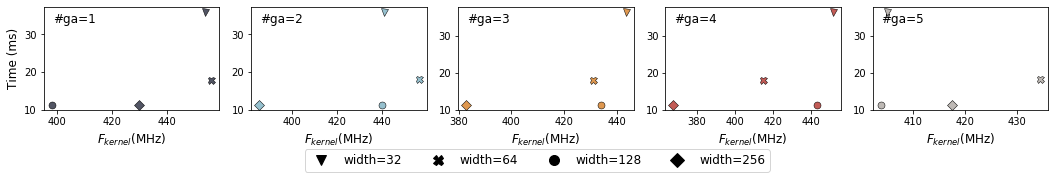

In [138]:
#Frequency Dependency
from matplotlib.ticker import FormatStrFormatter

colorcycle = ['#525564','#96c0ce','#df9850','#c25B56','#beb9b5','#dfBA87']

r=1
c=5
fig1, ax1 = plt.subplots(r,c, figsize=(18,1.9))
# i=0
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
groupW = ["width=32", "width=64", "width=128", "width=256"]


min_frq=np.min(mn1.get("Frequency (MHz)"))



plt.subplot(r,c,1)
plt.subplots_adjust(hspace=0.45,wspace=0.18)
for i in range (0,5):   
    plt.subplot(r,c,i+1)
    for j in range (0,4):
        plt.plot (mn1.loc[[i*4+j], "Frequency (MHz)"],
             np.multiply(mc1.loc[[i*4+j], "Time (ms)"] , 1),
              #label=groupW[j],
              color=colorcycle[i],
              marker=marker_data[j],
              linestyle="",
              markeredgewidth=0.5,
              markeredgecolor ='black',
#                   label=group[i],
              markersize=7
                 )
    plt.title(group[i],x=0.05,y=0.79,loc='left')
    plt.xlabel(r'$F_{kernel}$(MHz)',fontsize=fs)
    from matplotlib.ticker import StrMethodFormatter
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#     plt.legend()
#     plt.legend(custom_lines[0], group[0])
#         plt.xlim(right=490)
    if (i==0 or i==c):
       plt.ylabel("Time (ms)",fontsize=fs)

plt.subplot(r,c,3)

custom_lines=                 [
              Line2D([0],[0],linestyle="",marker=marker_data[0], color='black',lw=1,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[1],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[2],color='black',lw=2,markersize=10),
              Line2D([0],[0],linestyle="",marker=marker_data[3],color='black',lw=1,markersize=10),
             ]



#ax1
cont=np.concatenate([groupW])
plt.legend(custom_lines,cont,ncol=4,fontsize=fs,loc='upper center',bbox_to_anchor=(0.45, -0.32))

# plt.subplot(r,c,6)
# fig.patch.set_visible(False)
# plt.axis('off')

plt.savefig('Frq_dep_na.pdf',bbox_inches="tight")

In [323]:
LSU=mn1.get("LOAD/STORE")
WD=mn1.get("Width Units")
FRQ=mn1.get("Frequency (MHz)")*1e6
TIME=mn1.get("Time (ms)")

ST=mn1.get("LD units")
LD=mn1.get("ST Units")

BW=12800e6
# Fmem=2666e6
Fmem=800e6
dqbl=32
K_width=64
burst_n=5

TRCD=14e-9
TRP =14e-9

WI=32768000
ls_bytes=4
delta=3 * 4
dq=8
bl=4


LSU=np.ones(len(WD))

max_th=32 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta+1)
max_word=np.zeros(len(WD))
for i in range (0,len(WD)):
    if(lim_th[i]<max_burst):
        max_word[i]=lim_th[i]
    else:
        max_word[i]=WD[i]

burst_size=max_word/delta
burst_size=32*np.ceil(np.divide(burst_size,32*np.ones(len(WD))))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
     LSU[i]=1
     T_ovh[i]=((LSU[i])/(burst_size[i]))*((TRCD+TRP))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

## IF the memory occupancy is low the number of cycles depends of kernel frequency
max_burst= WD/8 *LSU /(dq*bl  )
bin=(max_burst>1)    
bin= np.multiply(bin,1)
bin=(BW>=(12800e6)) 

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*delta*bin*1000
T_ovh=T_ovh*delta*bin*1000

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0     200.440098
1     228.205128
2     244.394619
3     258.564342
4     194.676259
5     228.731942
6     245.362563
7     243.048576
8     194.605610
9     228.556150
10    244.008959
11    239.823009
12    171.018968
13    228.556150
14    244.105293
15    231.034483
16    154.832020
17    228.468324
18    244.394619
19    258.459743
Name: Time (ms), dtype: float64


In [340]:
LSU=mn1.get("LOAD/STORE")
WD=mn1.get("Width Units")
FRQ=mn1.get("Frequency (MHz)")*1e6
TIME=mn1.get("Time (ms)")

ST=mn1.get("LD units")
LD=mn1.get("ST Units")

BW=12800e6
Fmem=800e6

burst_n=5

TRCD=14e-9
TRP=TRCD

WI=32768000
ls_bytes=4
delta=3
dq=8
bl=4
dqbl=dq*bl
LSU=np.ones(len(WD))

#update
fmax=450e6
fmin=BW/dqbl*(dqbl*8/(WD))*delta

print(fmin/1e6)
BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LSU[i] == 1):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(fmax*2/fmin[i])
            #BW[i]=BW[i]*(fmax/(fmin[i]))
    if (BW[i]>12800e6):
        BW[i]=12800e6
print (BW)
##



max_th=64 #from Ip
max_burst=2**(burst_n) * dq * bl 
lim_th=max_th*(WD/8)/(delta+1)
max_word=np.zeros(len(WD))
for i in range (0,len(WD)):
    if(lim_th[i]<max_burst):
        max_word[i]=lim_th[i]
    else:
        max_word[i]=WD[i]

burst_size=max_word/delta
burst_size=64*np.ceil(np.divide(burst_size,64*np.ones(len(WD))))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
     
     T_ovh[i]=((LSU[i])/(burst_size[i]))*((TRCD+TRP))*ls_bytes*WI
     
     if (LSU[i]<3):
        T_ovh[i]=0
     Tco = 0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)

## IF the memory occupancy is low the number of cycles depends of kernel frequency
max_burst= WD/8 *LSU /(dq*bl  * delta)
bin=(max_burst>1)    
bin= np.multiply(bin,1)
# bin= np.add(bin,1)
bin=(BW>=(12800e6)) 
#bin=np.ones(len(WD))
Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*delta*bin*1000
T_ovh=T_ovh*delta*bin*1000

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)
print(np.mean(error*bin)*2)

0     1200.0
1      600.0
2      300.0
3      150.0
4     1200.0
5      600.0
6      300.0
7      150.0
8     1200.0
9      600.0
10     300.0
11     150.0
12    1200.0
13     600.0
14     300.0
15     150.0
16    1200.0
17     600.0
18     300.0
19     150.0
Name: Width Units, dtype: float64
[4.80e+09 9.60e+09 1.28e+10 1.28e+10 4.80e+09 9.60e+09 1.28e+10 1.28e+10
 4.80e+09 9.60e+09 1.28e+10 1.28e+10 4.80e+09 9.60e+09 1.28e+10 1.28e+10
 4.80e+09 9.60e+09 1.28e+10 1.28e+10]
0      0.000000
1      0.000000
2     13.901345
3     10.358915
4      0.000000
5      0.000000
6     13.659359
7     14.237856
8      0.000000
9      0.000000
10    13.997760
11    15.044248
12     0.000000
13     0.000000
14    13.973677
15    17.241379
16     0.000000
17     0.000000
18    13.901345
19    10.385064
Name: Time (ms), dtype: float64
13.670094869727688


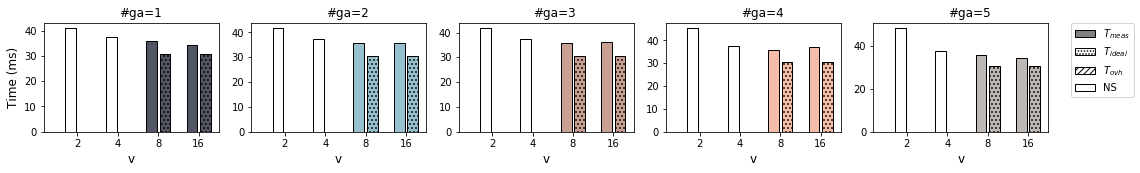

In [319]:
import matplotlib.patches as mpatches
r=1
c=5
width = ("2", "4", "8", "16")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_Nocoalesced_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

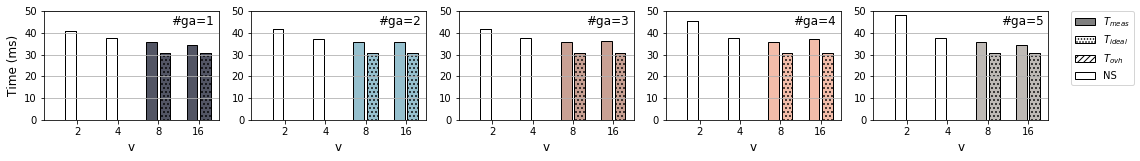

In [325]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
r=1
c=5
width = ("2", "4", "8", "16")
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=0.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mn1.loc[[i*4+j], "Time (ms)"] , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0,50])
    plt.grid(axis='y')

a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))


plt.savefig('Mem_model_Nocoalesced_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

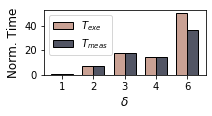

In [21]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1,2, 3, 4, 6]
deltaT_exe=[11.2, 82.6, 201.1, 164.15, 565.2]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])
estm=[10.2, 81.9, 201.1, 163.8, 405.5]
estm=np.divide(estm,deltaT_exe[0])

x = [1,2,3,4,5]
width=0.35

fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),estm,width, color=colorcycle[0],edgecolor='black' )
plt.legend([r'$T_{exe}$',r'$T_{meas}$'])
plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_coalesced_HBM_delta.pdf', bbox_inches="tight")


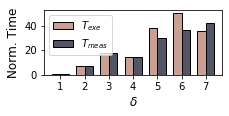

In [26]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1,2, 3, 4, 5, 6, 7]
deltaT_exe=[11.2, 82.6, 201.1, 164.15, 429.2, 565.2, 394.9]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])
estm=[10.2, 81.9, 201.1, 163.8, 337.9,405.5, 473.1]
estm=np.divide(estm,deltaT_exe[0])

x = [1,2,3,4,5,6,7]
width=0.35

#fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))
fig1, ax1 = plt.subplots(1,1, figsize=(3.2,1.2))

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),estm,width, color=colorcycle[0],edgecolor='black' )
plt.legend([r'$T_{exe}$',r'$T_{meas}$'])
plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_coalesced_HBM_delta.pdf', bbox_inches="tight")


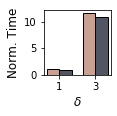

In [20]:
# testing the stride access
# for pair number the access generated are coalesced aligned
#this test is executed with #lsu=3

delta=[1,3]
deltaT_exe=[11.2,124.2]
ndeltaT_exe=np.divide(deltaT_exe,deltaT_exe[0])
estm=[10.2,122.8]
estm=np.divide(estm,deltaT_exe[0])

x = [1,2]
width=0.35

#fig1, ax1 = plt.subplots(1,1, figsize=(2.9,1.2))
fig1, ax1 = plt.subplots(1,1, figsize=(1.2,1.2))

plt.bar(np.add(x,-width/2),ndeltaT_exe, width, color=colorcycle[2],edgecolor='black' )
plt.xticks(x, delta) 
plt.bar(np.add(x,width/2),estm,width, color=colorcycle[0],edgecolor='black' )
plt.xlabel(r'$\delta$',fontsize=fs)
plt.ylabel("Norm. Time",fontsize=fs)

plt.savefig('Mem_model_Nocoalesced_HBM_delta.pdf', bbox_inches="tight")


# Burst Coalesced Write Acknowledge


In [330]:
import pandas as pd
mw1 = pd.read_csv("testMX_WACK_SVSB.csv",decimal=',')
# mc1["BW (MB/S)"]=pd.to_numeric(mc1["BW (MB/S)"])
mw1

,LOAD/STORE,SIMD,Frequency (MHz),BW read,BW write,Avr Write Burst,Avr Read Burst,Stall Read (%),Stall Write (%),Occupancy Write(%),...,LD units,Width LD,ST Units,Width Units,Latency,BW (MB/s),ALUT,FFS,RAMs,DSPs
0,1,2,453.72,0.0,9712.3,15,0,0,"32,97 %","88,5 %",...,0,0,1,256,44,97123.0,121718,281807.000,707.000,0
1,1,4,456.20,0.0,10599.8,15,0,0,"27,12 %","48,1 %",...,1,512,1,512,44,105998.0,123471,285035.000,720.000,0
2,1,8,398.08,0.0,11125.6,16,0,0,"12,43 %","28,9 %",...,2,1024,1,1024,44,111256.0,126426,293093.000,747.000,0
3,1,16,429.92,0.0,11503.5,16,0,0,"16,12 %","13,9 %",...,3,2048,1,2048,44,115035.0,132587,307428.000,801.000,0
4,2,2,440.72,9526.0,9525.0,15,15,"0,00 %","19,64 %","89,4 %",...,0,256,1,256,238,9525.0,124857,288822.000,713.000,0
5,2,4,456.20,10618.0,10618.0,15,15,"0,00 %","27,08 %","48,2 %",...,1,512,1,512,238,10618.0,126988,294918.000,726.000,0
6,2,8,440.14,11149.0,11152.0,15,16,"0,70 %","20,71 %","26,2 %",...,2,1024,1,1024,238,11152.0,130747,302877.000,753.000,0
7,2,16,385.35,11092.0,11007.0,15,16,"0,67 %","10,56 %","14,9 %",...,3,2048,1,2048,238,11007.0,138485,320024.000,808.000,0
8,3,2,443.45,9522.0,9522.0,15,15,"0,00 %","0,00 %","88,7 %",...,0,256,1,256,259,9522.0,127774,296143.000,731.000,6
9,3,4,431.03,10614.0,10614.0,15,15,"0,00 %","0,00 %","51,0 %",...,1,512,1,512,259,10614.0,130150,304280.000,756.000,12


In [335]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
FRQ=mw1.get("Frequency (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")*10
LD=mw1.get("LD units")
ST=mw1.get("ST Units")

BW=12800e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=4
burst_n=5


TRCD=14e-9
TRP =14e-9
TWR=15e-9
WI=32768000
ls_bytes=4
delta=16*2

burst_size=2**(burst_n)*dq*bl
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

LSU=np.ones(len(WD))


#update
fmax=450e6
fmin=(BW/(dq*bl))*(dq*bl*8/(32*SIMD))
fmin= np.ones((len(WD)))*fmin
print(fmin/1e6)
BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LSU[i] == 1):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(fmax*2/fmin[i])
            #BW[i]=BW[i]*(fmax/(fmin[i]))
    if (BW[i]>12800e6):
        BW[i]=12800e6
print (BW)
##

#ST=np.ones(len(WD))
#LD=np.ones(len(WD))

T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
    #the burst coalesced aligned units
     T_ovh[i]=((LSU[i])/(burst_size))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     #only one bank access
     #if (ST[i]<3 or LSU[i]<2):
     #   T_ovh[i]=0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)
#WD/8 to express in bytes
max_burst= WD/8 *(ST+LD) /(dq*bl)
bin=(max_burst>=1)    

bin=(fmax>=fmin) 

bin= np.multiply(bin,1)
bin= np.ones(len(bin))
print (bin)
Est_time = (T_exe)*1000 *bin*delta*bin
T_ideal=T_ideal*1000 *bin*(delta)*bin
T_ovh=T_ovh*1000 *bin*(delta)*bin

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0     1600.0
1      800.0
2      400.0
3      200.0
4     1600.0
5      800.0
6      400.0
7      200.0
8     1600.0
9      800.0
10     400.0
11     200.0
12    1600.0
13     800.0
14     400.0
15     200.0
16    1600.0
17     800.0
18     400.0
19     200.0
Name: SIMD, dtype: float64
[3.60e+09 7.20e+09 1.28e+10 1.28e+10 3.60e+09 7.20e+09 1.28e+10 1.28e+10
 3.60e+09 7.20e+09 1.28e+10 1.28e+10 3.60e+09 7.20e+09 1.28e+10 1.28e+10
 3.60e+09 7.20e+09 1.28e+10 1.28e+10]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0     11290.908123
1      7364.600190
2      5447.049327
3      5675.276335
4     11072.377511
5      7376.581892
6      5462.639685
7      5425.369068
8     11069.698926
9      7372.583720
10     5440.837626
11     5373.415929
12    10175.433221
13     7372.583720
14     5442.389247
15     5231.862069
16     9561.720079
17     7370.586237
18     5447.049327
19     5673.591599
Name: Time (ms), dtype: float64


In [343]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
FRQ=mw1.get("Frequency (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")*10
LD=mw1.get("LD units")
ST=mw1.get("ST Units")

BW=12800e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=4
burst_n=5


TRCD=14e-9
TRP =14e-9
TWR=15e-9
WI=32768000
ls_bytes=4
delta=16*2

burst_size=1
#2**(burst_n)*dq*bl
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

LSU=np.ones(len(WD))


#update
fmax=450e6
fmin=(BW/(dq*bl))*(dq*bl*8/(32*SIMD))
fmin= np.ones((len(WD)))*fmin
print(fmin/1e6)
BW=np.ones(len(WD))*BW

for i in range (0,len(WD)):
    if (fmin[i]>fmax):
        if (LSU[i] == 0):
            BW[i]=BW[i]*(fmax/(fmin[i]))
        else:
            BW[i]=BW[i]*(fmax*2/fmin[i])
            #BW[i]=BW[i]*(fmax/(fmin[i]))
    if (BW[i]>12800e6):
        BW[i]=12800e6
print (BW/1e6)
##

#ST=np.ones(len(WD))
#LD=np.ones(len(WD))
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))
T_ideal=LSU/BW *ls_bytes*WI 
for i in range (0,len(WD)):
     LSU[i]=1
     T_ovh[i]=((LSU[i])/(burst_size))*(TRCD+TRP+TWR)*ls_bytes*WI 
     if (LSU[i]<3):
        T_ovh[i]=0

     T_exe[i]=T_ideal[i]+(T_ovh[i])*delta

max_burts= WD/8 *LSU /dqbl
#WD/8 to express in bytes
max_burst= WD/8 *(ST+LD) /(dq*bl)
bin=(max_burst>=1)    

bin=(BW>=12800e6) 

bin= np.multiply(bin,1)
#bin= np.ones(len(bin))
print (bin)
#delta=1
Est_time = (T_exe)*1000 *bin*delta*bin
T_ideal=T_ideal*1000 *bin*(delta)*bin
T_ovh=T_ovh*1000 *bin*(delta)*bin

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)
print(sum(error*bin)/sum(bin))

0     1600.0
1      800.0
2      400.0
3      200.0
4     1600.0
5      800.0
6      400.0
7      200.0
8     1600.0
9      800.0
10     400.0
11     200.0
12    1600.0
13     800.0
14     400.0
15     200.0
16    1600.0
17     800.0
18     400.0
19     200.0
Name: SIMD, dtype: float64
[ 7200. 12800. 12800. 12800.  7200. 12800. 12800. 12800.  7200. 12800.
 12800. 12800.  7200. 12800. 12800. 12800.  7200. 12800. 12800. 12800.]
[0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
0      0.000000
1     12.478632
2      8.161435
3      4.382842
4      0.000000
5     12.338149
6      7.903316
7      8.520380
8      0.000000
9     12.385027
10     8.264278
11     9.380531
12     0.000000
13    12.385027
14     8.238589
15    11.724138
16     0.000000
17    12.408447
18     8.161435
19     4.410735
Name: Time (ms), dtype: float64
9.40953068313075


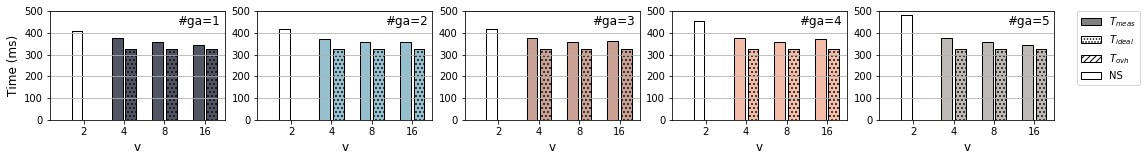

In [333]:
import matplotlib.patches as mpatches
r=1
c=5
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"]*10 , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.85,y=.82,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"]*10 , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] *10 , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
    plt.ylim([0,500])
    plt.grid(axis='y')
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_WriteAck_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

In [328]:
LSU=mw1.get("LOAD/STORE")
WD=mw1.get("Width Units")
FRQ=mw1.get("Frequency (MHz)")*1e6
SIMD=mw1.get("SIMD")
TIME=mw1.get("Time (ms)")*10
LD=mw1.get("LD units")
ST=mw1.get("ST Units")

BW=12800e6
Fmem=1866e6
#Fmem=2666e6
dq=8
bl=4
burst_n=5

TRCD=14e-9
TRP=TRCD
TWR=15e-9

WI=32768000
ls_bytes=4
delta=16

burst_size=2**(burst_n)*dq*bl
T_exe=np.zeros(len(WD))
T_ovh=np.zeros(len(WD))

LSU=np.ones(len(WD))

T_ideal=LSU/BW *ls_bytes*WI 

for i in range (0,len(WD)):
    #the burst coalesced aligned units
     T_ovh[i]=((LSU[i])/(burst_size))*((TRCD+TRP))*ls_bytes*WI
     T_ovh[i]+=((1)/(burst_size))*((TRCD+TRP+TWR))*ls_bytes*WI
     #only one bank access
    # if (ST[i]<3 or LSU[i]<2):
    #    T_ovh[i]=0
     T_exe[i]=(T_ideal[i]+T_ovh[i]) *(delta)
#WD/8 to express in bytes
max_burst= WD/8 *(ST+LD) /(dq*bl)
bin=(max_burst>=1)    
bin= np.multiply(bin,1)

Est_time = (T_exe)*1000 *bin
T_ideal=T_ideal*1000 *bin*(delta)
T_ovh=T_ovh*1000 *bin*(delta)

error= (np.abs(Est_time-TIME)/TIME)*100
print (error*bin)

0     24.389242
1     17.401709
2     13.327354
3      9.761307
4     25.839808
5     17.269128
6     13.083755
7     13.666108
8     25.857588
9     17.313369
10    13.424412
11    14.477876
12    31.793560
13    17.313369
14    13.400168
15    16.689655
16    35.867275
17    17.335472
18    13.327354
19     9.787631
dtype: float64


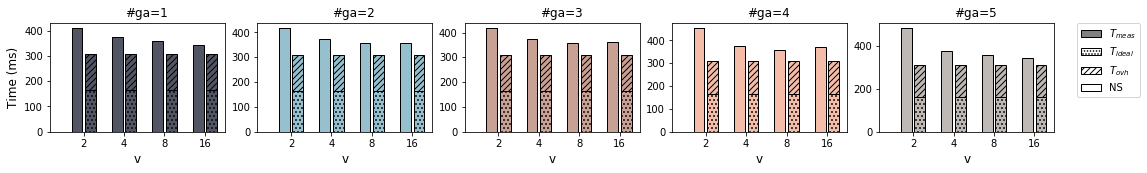

In [329]:
import matplotlib.patches as mpatches
r=1
c=5
group = ("#ga=1", "#ga=2", "#ga=3", "#ga=4", "#ga=5")
width = ("2", "4", "8", "16")
colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']
fig1, ax1 = plt.subplots(r,c, figsize=(18,2))
# i=0
plt.subplots_adjust(hspace=0.45,wspace=0.185)

for i in range (0,5):   
    plt.subplot(r,c,i+1)
    y_pos=range(2,16*2,3)
    for j in range (0,4): 
        if (j==0):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"]*10 , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
            )
            plt.title(group[i],x=0.55,y=1,loc='center')
        if (bin[i*4+j]==1):
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"]*10 , 1),
             alpha=1, color=colorcycle[i],linewidth=1,edgecolor='black'
                     #,hatch = '|||'
                    )
        else:
            plt.bar (y_pos[j],
             np.divide(mw1.loc[[i*4+j], "Time (ms)"] *10 , 1),
             alpha=1, color='white',linewidth=1,edgecolor='black')
        
    y_pos=np.add(y_pos,1)
    bot_Tideal=[T_ideal[i*4],T_ideal[i*4+1],T_ideal[i*4+2],T_ideal[i*4+3]]
    top_Tovh=[T_ovh[i*4],T_ovh[i*4+1],T_ovh[i*4+2],T_ovh[i*4+3]]
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '...',edgecolor='black'
            )
    plt.bar ([y_pos[0],y_pos[1],y_pos[2],y_pos[3]],
             top_Tovh,
             bottom=bot_Tideal,
             alpha=1, color=colorcycle[i],  hatch = '////',edgecolor='black'
            )
    plt.xlabel("v",fontsize=fs)
    if (i==0):
        plt.ylabel("Time (ms)",fontsize=fs)

    y_pos=range(2,16*2,3)
    y_pos=np.add(y_pos,0.5)
    plt.xticks(y_pos, width)   

    plt.xlim([0,13])
a_val=1
circ1 = mpatches.Patch( facecolor='w',alpha=a_val,hatch=r'////',label=r'$T_{ovh}$',edgecolor='black')
circ2= mpatches.Patch( facecolor='w',alpha=a_val,hatch='....',label=r'$T_{ideal}$',edgecolor='black')
circ3 = mpatches.Patch(facecolor='grey',label=r'$T_{meas}$',edgecolor='black')
#circ3 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='|||',label=r'$T_{meas}$',edgecolor='black')
circ4 = mpatches.Patch(facecolor='w',alpha=a_val,hatch='',label=r'NS',edgecolor='black')
plt.legend(handles = [circ3,circ2,circ1,circ4],loc=2,bbox_to_anchor=(1.1, 1.05))

plt.savefig('Mem_model_WriteAck_HBM_bar_ovh2.pdf', bbox_inches="tight")

error= (np.abs(Est_time-TIME)/TIME)*100

DElTA VALUES

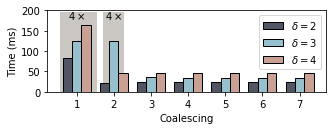

In [157]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

colorcycle = ['#525564','#96c0ce','#c9a194','#f3bdaa','#beb9b5','#dfBA87']

delta2=[
    82.2,
22.72,
24.36,
24.38,
24.35,
24.4,
24.4   
]
delta3=[123.69,
123.69,
35.8,
34.3,
34.3,
34.4,
34.4  
]

delta4=[
    164.15,
44.92,
45.1,
44.9,
45.8,
45.9,
45.9 
]

x = np.arange(1,len(delta2)+1)  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(5,1.5))

rects4 = ax.bar(width+0.8, 195, width*4, color=colorcycle[4], alpha=0.8)
rects4 = ax.bar(width+1.75, 195, width*2+0.06, color=colorcycle[4], alpha=0.8)

rects1 = ax.bar(x - width, delta2, width, label=r'$\delta=2$', color=colorcycle[0],edgecolor='black')
rects2 = ax.bar(x, delta3, width, label=r'$\delta=3$', color=colorcycle[1],edgecolor='black')
rects3 = ax.bar(x + width, delta4, width, label=r'$\delta=4$', color=colorcycle[2],edgecolor='black')


plt.ylim([0, 200])

plt.ylabel("Time (ms)",fontsize=10)
plt.xlabel("Coalescing",fontsize=10)

plt.legend()


labels = ["label%d" % i for i in np.arange(len(delta2))]

# zip joins x and y coordinates in pairs
for x,y in zip(x,delta3):
    if (x<3):
        label = r"$4\times$"
    else:
        label = r""
    plt.annotate(label, # this is the text
                 (x,y+30), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.savefig('coalescing_HBM_delta.pdf', bbox_inches="tight")



